In [1]:
from __future__ import division, print_function, with_statement
import netCDF4 as nc
import numpy as np
from mpl_toolkits import basemap
from mpl_toolkits.basemap import Basemap
import scipy.interpolate
import numpy.ma as ma
import scipy.io as sio
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib as mpl
%matplotlib inline

In [2]:
wave_name = ['15x','15y','20x','20y','25x','25y','30x','30y',
             '35x','35y','40x','40y','45x','45y']
wave_average = np.array([0.904663927344,0.778144479726,0.590884321825,
                         0.585455667094,0.503952202042,0.493380169389,
                         0.412971186439,0.413120350978,0.351011977077,
                         0.363569761818,0.321602813796,0.329348412255,
                         0.302020772384,0.301424114451])
wave_average = np.around(wave_average, decimals=2)
print(wave_average)

[ 0.9   0.78  0.59  0.59  0.5   0.49  0.41  0.41  0.35  0.36  0.32  0.33
  0.3   0.3 ]


In [3]:
kappa = np.arange(0.1,4.0,0.01)

q = 0.3
E = 10 #Jayne and Laurent 2001
rho = 1.025
z_star = 1
zp_star = 1/kappa
N = 0.2
N_avg = 2.5
H = 3000

In [4]:
eps = (q*E/((rho)*(1+(z_star/zp_star))**2))*(N**2/N_avg**2)*(1/H + 1/zp_star)
K = 0.2*eps/(N**2)

In [5]:
index = np.zeros_like(wave_average)
k_match = np.zeros_like(wave_average,dtype=float)
for i in np.arange(0,len(wave_average)):
    for j in np.arange(0,len(kappa)):
#         print(kappa[j], wave_average[i])
        if str(kappa[j]) == str(wave_average[i]):
           # print('equal')
            k_match[i] = K[j]
            
print(k_match)

[ 0.02335842  0.02306681  0.02187008  0.02187008  0.02082688  0.02068551
  0.01933063  0.01933063  0.01800368  0.01824627  0.01721875  0.01749027
  0.01664425  0.01664425]


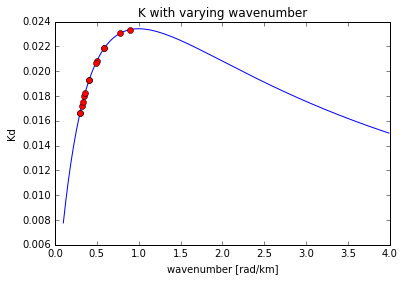

In [6]:
plt.plot(kappa,K)
plt.xlabel('wavenumber [rad/km]')
plt.ylabel('Kd')
plt.plot(wave_average,k_match, 'ro')
plt.title('K with varying wavenumber')
plt.show()